In [13]:
# ExchangeEconomyClass

%load_ext autoreload
%autoreload 2
from chris import ExchangeEconomyClass

# Creating market from class

market = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 4a
## A chooses the price
We call A_sets_price from market. The function loops through all prices in P_1 and calculates the utility for consumer A. The function saves utility each time it finds a utility which is higher than the previous highest utility, thus leaving us with the highest utility for the prices in $\mathcal{P}_1$.

In [20]:
P_1 = market.P_1()
x1a_4a, x2a_4a, util_4a, p1_4a = market.A_sets_price(P_1)


print(f'A chooses the market price')
print(f'-----------------------------')
print(f'Consumption of good 1: {x1a_4a:.4f}')
print(f'Consumption of good 2: {x2a_4a:.4f}')
print(f'Utility of A: {util_4a:.4f}')
print(f'Utility of B: {market.utility_B(1-x1a_4a, 1-x2a_4a):.4f}')
print(f'The optimal price: {p1_4a:.5}')

A chooses the market price
-----------------------------
Consumption of good 1: 0.6193
Consumption of good 2: 0.6409
Utility of A: 0.6336
Utility of B: 0.3734
The optimal price: 1.8867


We plot the utility function of A from the prices in $\mathcal{P}_1$ and the maximum which we found.

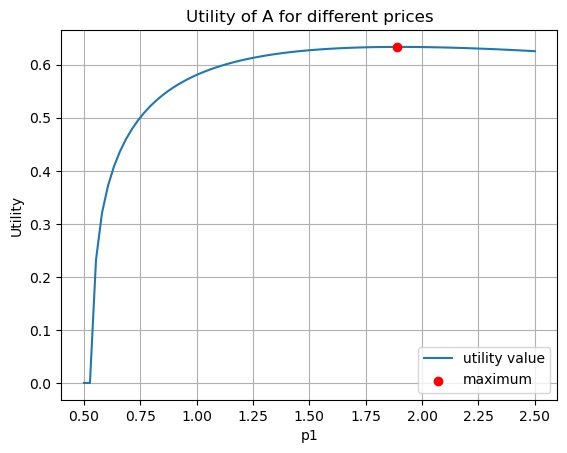

In [17]:
market.plot_utility_A(P_1)

# Question 4b
We now call an optimizer to solve the maximization problem. We call A_sets_price_optimize() from market. The function uses the same utility function as in 4a, but now uses np.optimize with the method "SLSQP" to solve the problem.

In [9]:
x1a_4b, x2a_4b, util_4b, p1_4b = market.A_sets_price_optimize()

# Compare with numerical optimization

print(f'Restricted price = {p1_4a:.3f}\nRestricted utility = {util_4a:.4f}\n')
print(f'Unrestricted price = {p1_4b:.3f}\nUnrestricted utility = {util_4b:.4f}\n')

diff_p = p1_4b - p1_4a
diff_util = util_4b - util_4a
print(f'difference in price = {diff_p:.3f}')
print(f'difference in utility = {diff_util:.6f}')

Restricted price = 1.887
Restricted utility = 0.6336

Unrestricted price = 1.897
Unrestricted utility = 0.6336

difference in price = 0.010
difference in utility = 0.000005


The optimizer is better as it finds a higher utility because it freely chooses any point rather than a fixed set. However, the results are very similar when comparing the two methods. There is a slight difference in price and the utility is almost exactly the same. The tiny difference in utility is explained by the utility function being very flat around it's peak.

# Question 5a
## A is the market maker

A now chooses the Pareto point in $\mathcal{C}$ that maximizes his own utility. The function A_market_maker loops through all 1543 Pareto combinations of $x_1^A$ and $x_2^A$ and saves the utility each time a combination leads to a higher utility than the previous combination.

In [19]:
x1a_5a, x2a_5a, util_5a = market.A_market_maker()

print(f'x1A = {x1a_5a:.4f}')
print(f'x2A = {x2a_5a:.4f}\n')
print(f'utility_A = {util_5a:.4f}')
print(f'utility_B = {market.utility_B(1-x1a_5a, 1-x2a_5a):.4f}')


x1A = 0.5811
x2A = 0.8378

utility_A = 0.7416
utility_B = 0.3053


As expected the utility of consumer A is now higher than in 4, because A can now freely choose the point in C which benefits him the most rather than having to trade with consumer B.

A now consumes more of good 2 which he derives more utility from and less of good 1. The utility of B has understandbly fallen. 

## Question 5B
We now repeat the same analysis but with a constrained optimizer. A_market_maker_optimize calls a constrained optimizer which maximizes the utility of A under the constraint that the utility of B is at least equal to $\bar{u}_B$, which is the utility when consuming the intial endowment.


In [25]:
x1a_5b, x2a_5b, util_5b = market.A_market_maker_optimize()

print(f'x1A = {x1a_5b:.4f}')
print(f'x2A = {x2a_5b:.4f}')
print(f'utility of A = {util_5b:.4f}')
print(f'utility of B = {market.utility_B(1-x1a_5b, 1-x2a_5b):.4f}\n')
print(f'Comparing 5a and 5b:')
print(f'difference in utility of A = {util_5b - util_5a:.4f}')

x1A = 0.5757
x2A = 0.8444
utility of A = 0.7432
utility of B = 0.3037

Comparing 5a and 5b:
difference in utility of A = 0.0016


The optimizer again beats the manual looping as expected, but the difference in consumption and utility is again very small.